In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
h1 = np.array([-1, 2, 6, 2, -1])/8
h2 = np.array([-1, 2, -1])/4
g1 = np.array([1, 2, 1])/2
g2 = np.array([-1, -2, 6, -2, -1])/4

rms_ref: 5.319223348039854
step: 11.464646464646464
CR: 4.146892484805908
bits: 53421.1656310753
rms: 6.3026743409031285
rms_ref: 6.761058179469041
step: 12.03030303030303
CR: 4.776447295270763
bits: 42991.152205799
rms: 7.578290681824528


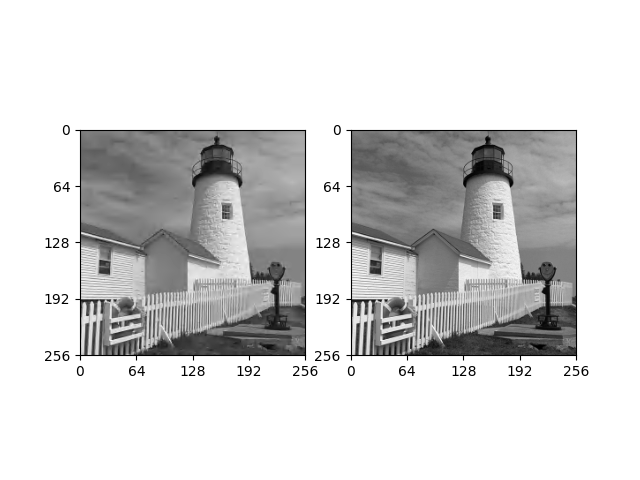

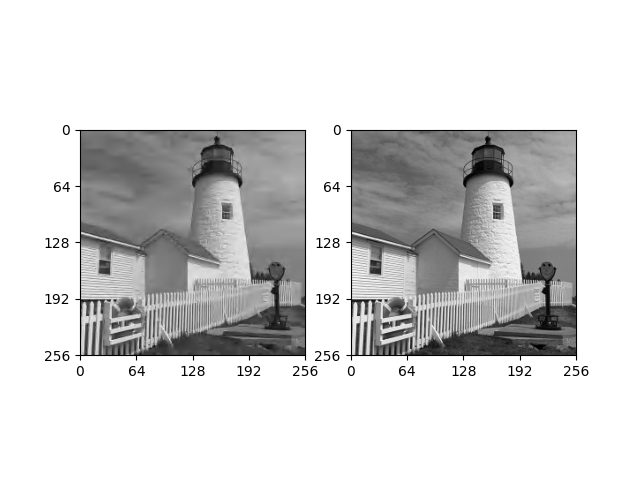

In [4]:
# Zl = DWT_analysis(lighthouse, 6, h1, h2, g1, g2, plot = True, qrise=0.5, strength=0.0)
Zl = DWT_analysis(lighthouse, 6, h1, h2, g1, g2, plot = True, qrise=0.7, strength=0.1)
Zl = DWT_analysis(lighthouse, 7, h1, h2, g1, g2, plot = True, qrise=1, strength=0.15)

rms_ref: 6.288166795762568
step: 15.0
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 53458
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


NameError: name 'X' is not defined

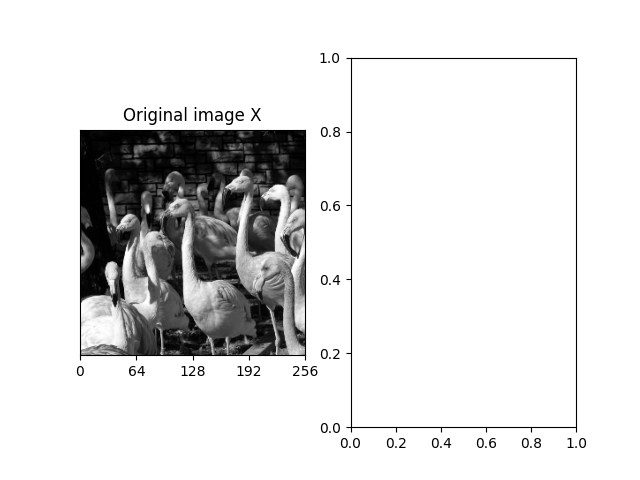

In [4]:
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec

N = 7

Yq, _, dwtstep, qrise, factors, strength = DWT_quant(flamingo, N, h1, h2, g1, g2, qrise = 1.3, strength=1.4)
fig, axs = plt.subplots(1, 2)
plot_image(flamingo, ax=axs[0])
axs[0].set(title='Original image X', yticks=[])

vlc, header = DWT_huffenc(Yq, N, dcbits=12, opthuff=True)
Z = DWT_huffdec(vlc, qrise, factors, strength, N, hufftab=header, dcbits=12)
reconstructed = inverse_DWT(Z, N, g1, g2)
plot_image(reconstructed, ax=axs[1])
size_of_img = np.sum(vlc[:, 1])
axs[1].set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')
print("Error:", np.std(reconstructed-flamingo).round(2))

rms_ref: 8.859943275584582
step: 7.505050505050505
CR: 3.156853026493551
bits: 65686.78950304235
rms: 10.611766255909284
rms_ref: 4.803558992381568
step: 8.919191919191919
CR: 3.0885949557027943
bits: 77830.27239691107
rms: 9.969150810698693
rms_ref: 4.803558992381568
step: 12
CR: 4.069831521104063
bits: 59065.390171449166
rms: 11.782944559568902


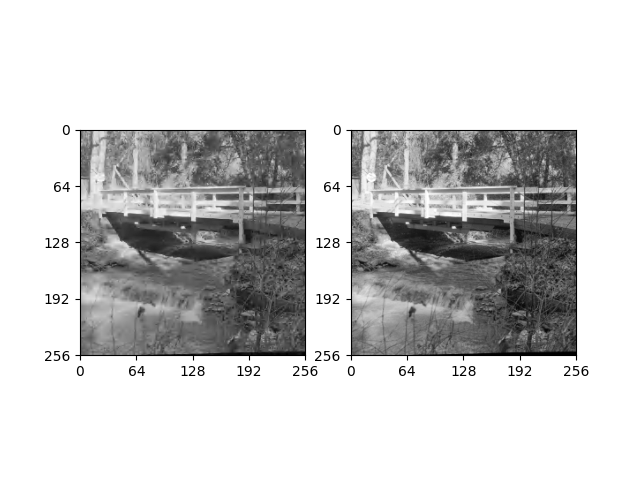

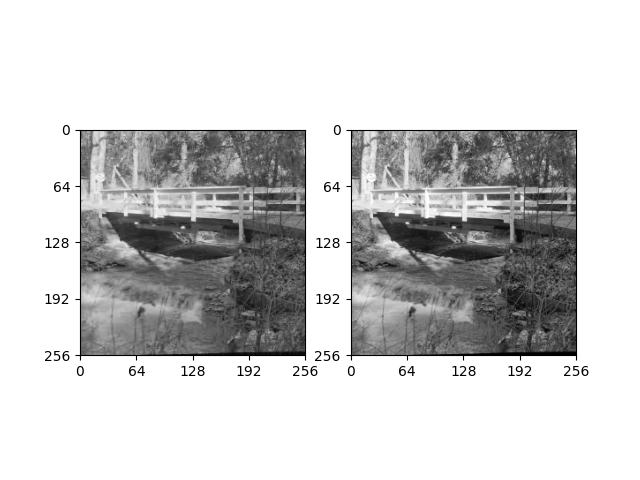

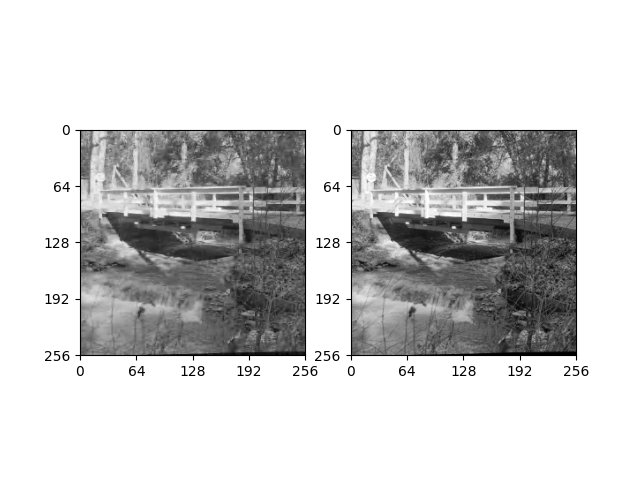

In [4]:
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=1.5, strength=0)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.5)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, step = 12, plot = True, qrise=0.2, strength=0.5)

rms_ref: 4.992109372773084
step: 10.191919191919192
CR: 4.508024668248755
bits: 55023.7943557028
rms: 8.918225839678103


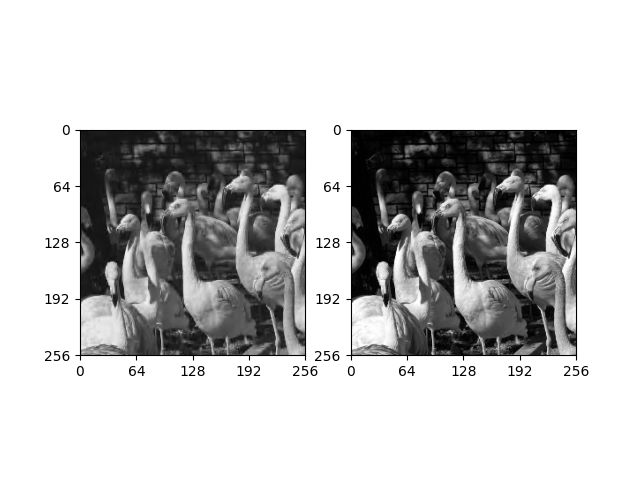

In [5]:
Zf = DWT_analysis(flamingo, 6, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.3)

In [9]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)